In [ ]:
from tarfile import data_filter

import pandas as pd
import numpy as np
import importlib
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from pandas.core.interchange.dataframe_protocol import DataFrame
from ply.cpp import xrange
from pygments.lexer import bygroups

import volpy_func_lib as vp
import load_clean_lib
import table_lib

from datetime import datetime
from volpy_func_lib import load_forward_price

In [211]:
importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)

<module 'table_lib' from 'c:\\Users\\axell\\Desktop\\CBS\\master\\volpy\\table_lib.py'>

In [212]:
IV_type = "om" # om = OptionMetrics IV, "bid"/"ask"/"mid" price
# data_folder = "i2s1 full"
data_folder = "i4s4_CW"
profile = "Axel"
ticker_list = ["SPX", "AMZN"] #None
# ticker_list = ["SPX"]

# Load data and clean
od, returns_and_prices = load_clean_lib.load_clean_and_prepare_od(data_folder = data_folder, profile = profile, tickers = ticker_list, first_day = None, last_day = None, IV_type = IV_type)
print("Data loaded")
# Calculate results such as SW, RV ect.
summary_dly_df, od_rdy = load_clean_lib.create_summary_dly_df(od, returns_and_prices, first_day=None, last_day=None, n_grid=2000)

Data loaded


Processing Groups: 100%|██████████| 6124/6124 [00:07<00:00, 867.53it/s] 


In [213]:
summary_dly_df = summary_dly_df.reset_index()

In [214]:
# # Make tables for SW_return_day
# table_lib.CarrWu2009_table_1(summary_dly_df, print_latex = False)
table_lib.CarrWu2009_table_2(summary_dly_df, print_latex = False)
# table_lib.CarrWu2009_table_3(summary_dly_df, print_latex = False)

,ticker,Mean_RV,Std_RV,Auto_RV,Skew_RV,Kurt_RV,Mean_SW,Std_SW,Auto_SW,Skew_SW,Kurt_SW
1,SPX,4.076896,3.361165,0.985582,2.126230,5.187277,5.852309,3.179158,0.959481,1.815075,4.168255
0,AMZN,92.209272,60.407500,0.972509,1.000111,0.758634,101.893405,55.357416,0.975657,1.584086,2.937724


In [215]:
import pandas as pd

# 1) For hvert optionid, find antallet af unikke strikes
strike_change_df = (
    od.groupby('optionid')['K']
      .nunique()  # Antal unikke strikes pr. optionid
      .reset_index(name='unique_strikes')
)

# 2) Filtrer til dem, hvor der er mere end 1 unik strike
optionids_with_strike_change = strike_change_df[strike_change_df['unique_strikes'] > 1]

print("OptionIDs med ændret strike over tid:")
print(optionids_with_strike_change)

# 3) Hvis du vil se de konkrete rækker, hvor det sker:
optionids_list = optionids_with_strike_change['optionid'].unique()
od_strike_change_rows = od[od['optionid'].isin(optionids_list)].copy()
od_strike_change_rows.sort_values(['optionid','date'], inplace=True)

OptionIDs med ændret strike over tid:
        optionid  unique_strikes
0     10000370.0               2
13    10005761.0               2
17    10007911.0               2
30    10013732.0               2
37    10015532.0               2
...          ...             ...
5106  11784565.0               2
5155  11799499.0               2
5172  11803874.0               2
5174  11804667.0               2
5183  11807474.0               2

[352 rows x 2 columns]


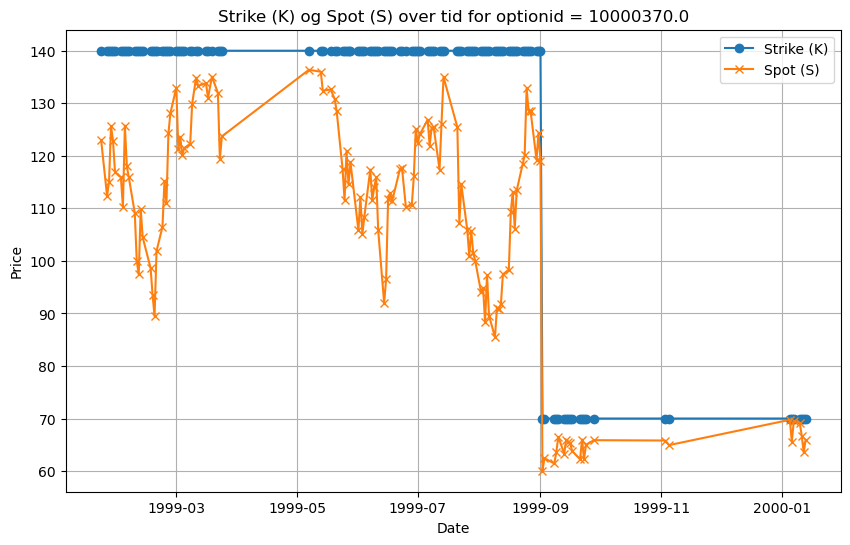

In [ ]:
import matplotlib.pyplot as plt

def plot_option_strike_and_spot_over_time(df, option_id):
    # Filtrér data for det ønskede optionid
    df_option = df[df['optionid'] == option_id].copy()
    
    # Sortér efter dato
    df_option.sort_values('date', inplace=True)
    
    # Plot
    plt.figure(figsize=(10,6))
    
    # Plot strike (K)
    plt.plot(df_option['date'], df_option['K'], marker='o', linestyle='-', label='Strike (K)')
    
    # Plot spotprisen (S)
    plt.plot(df_option['date'], df_option['S'], marker='x', linestyle='-', label='Spot (S)')
    
    plt.title(f'Strike (K) og Spot (S) over tid for optionid = {option_id}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Eksempel på kald:
plot_option_strike_and_spot_over_time(od, 10000370.0)


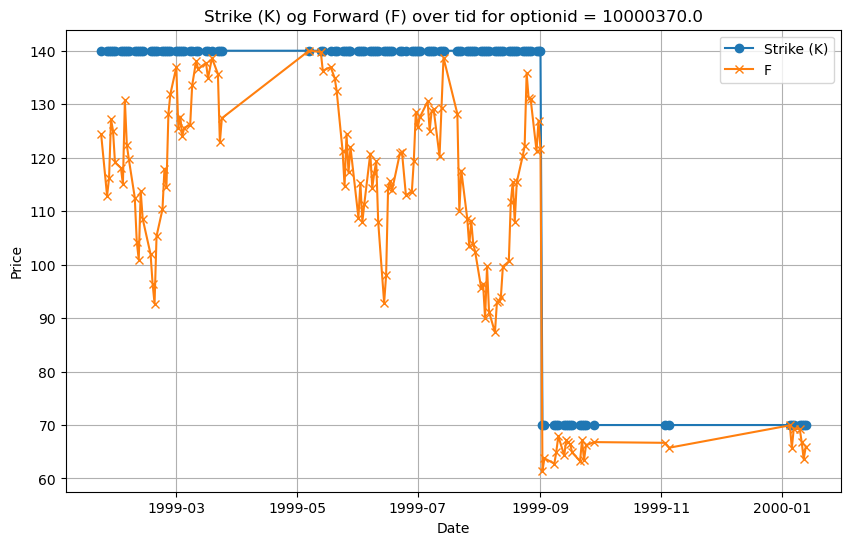

In [221]:
import matplotlib.pyplot as plt

def plot_option_strike_and_fwd_over_time(df, option_id):
    # Filtrér data for det ønskede optionid
    df_option = df[df['optionid'] == option_id].copy()
    
    # Sortér efter dato
    df_option.sort_values('date', inplace=True)
    
    # Plot
    plt.figure(figsize=(10,6))
    
    # Plot strike (K)
    plt.plot(df_option['date'], df_option['K'], marker='o', linestyle='-', label='Strike (K)')
    
    # Plot spotprisen (S)
    plt.plot(df_option['date'], df_option['F'], marker='x', linestyle='-', label='F')
    
    plt.title(f'Strike (K) og Forward (F) over tid for optionid = {option_id}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Eksempel på kald:
plot_option_strike_and_fwd_over_time(od, 10000370.0)

In [8]:
# Save
date_str = datetime.now().strftime("%Y-%m_%d_%H-%M")
summary_dly_df.to_csv(f"data/summary_dly_df {date_str}.csv")
od_rdy.to_csv(f"data/od_rdy {date_str}.csv")

In [8]:
# Load
summary_dly_df = pd.read_csv(f"data/summary_dly_df {date_str}.csv")
od_rdy = pd.read_csv(f"data/od_rdy {date_str}.csv")

NameError: name 'date_str' is not defined

In [43]:
summary_dly_df["RV_0_30-SW_0_30"] = summary_dly_df["RV"] - summary_dly_df["SW_0_30"]

In [118]:
dftester  = pd.read_csv(r"C:\Users\axell\Desktop\CBS\data\OptionMetrics\i4s4_CW\forward price.csv")

C:\Users\axell\AppData\Local\Temp\ipykernel_18612\1133937577.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dftester  = pd.read_csv(r"C:\Users\axell\Desktop\CBS\data\OptionMetrics\i4s4_CW\forward price.csv")


In [125]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_forward_price(df, ticker, yval):
    # Filtrér DataFrame for den ønskede ticker
    df_ticker = df[df['ticker'] == ticker].copy()
    
    # Sørg for at 'date' er i datetime-format
    df_ticker['date'] = pd.to_datetime(df_ticker['date'])
    
    # Sortér efter dato, så grafen bliver i kronologisk rækkefølge
    df_ticker.sort_values('date', inplace=True)
    
    # Plot
    plt.figure(figsize=(10,6))
    plt.plot(df_ticker['date'], df_ticker[yval], marker='o', label=f'{ticker} Forward Price')
    
    # Diagram-indstillinger
    plt.xlabel('Date')
    plt.ylabel('Forward Price')
    plt.title(f'Forward Price Over Time for {ticker}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Eksempel på brug:
# plot_forward_price(dftester, 'AMZN')


In [124]:
import pandas as pd

# Sørg for at 'date' er i datetime-format og sorter DataFrame
dftester['date'] = pd.to_datetime(dftester['date'])
dftester.sort_values(['ticker', 'date'], inplace=True)

# Beregn procentvis ændring for forwardpriserne inden for hver ticker
dftester['fw_r'] = dftester.groupby('ticker')['forwardprice'].pct_change()

# Se de første par rækker for at tjekke resultatet
print(dftester.head())


      secid ticker     cusip           issuer       date  expiration  \
0  101310.0   AMZN  02313510  AMAZON.COM INC. 1997-11-19  1997-12-20   
1  101310.0   AMZN  02313510  AMAZON.COM INC. 1997-11-19  1998-01-17   
2  101310.0   AMZN  02313510  AMAZON.COM INC. 1997-11-19  1998-04-18   
3  101310.0   AMZN  02313510  AMAZON.COM INC. 1997-11-19  1998-07-18   
4  101310.0   AMZN  02313510  AMAZON.COM INC. 1997-11-20  1997-12-20   

   amsettlement  forwardprice      fw_r  
0           0.0     53.563595       NaN  
1           0.0     53.421909 -0.002645  
2           0.0     53.468429  0.000871  
3           0.0     53.868068  0.007474  
4           0.0     54.326074  0.008502  


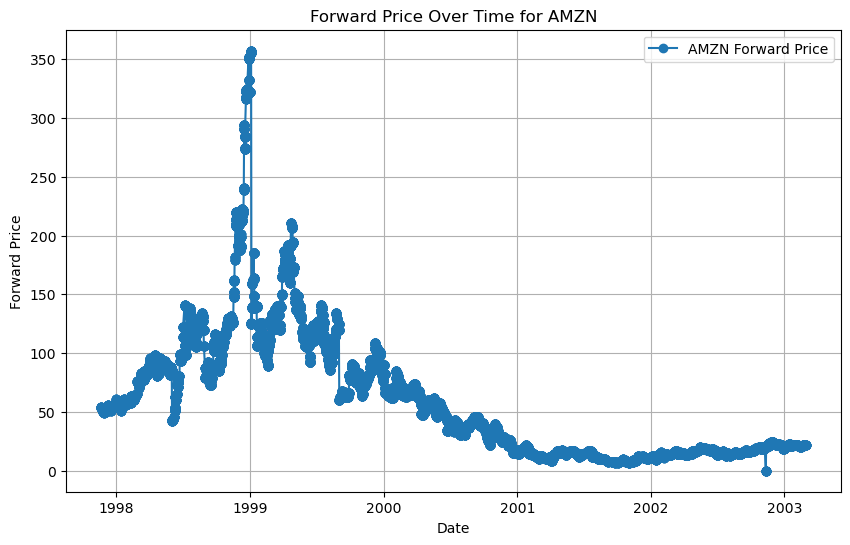

In [134]:
plot_forward_price(od_rdy, "AMZN", "F")

In [135]:
od_rdy

,date,exdate,cp_flag,K,bid,ask,volume,IV_om,optionid,ticker,n_trading_day,days,spread,mid,F,r,IV,low,high
40,1996-01-04,1996-01-20,P,75.0,0.1875,0.2500,422,0.468090,10324542,IBM,0,16,0.0625,0.21875,87.093136,0.057209,0.468090,True,False
42,1996-01-04,1996-01-20,C,100.0,0.1250,0.1875,1639,0.397731,10664612,IBM,0,16,0.0625,0.15625,87.093136,0.057209,0.397731,True,False
46,1996-01-04,1996-01-20,C,95.0,0.5000,0.5625,2979,0.386784,11038147,IBM,0,16,0.0625,0.53125,87.093136,0.057209,0.386784,True,False
47,1996-01-04,1996-01-20,P,70.0,0.0625,0.1250,845,0.544232,11096807,IBM,0,16,0.0625,0.09375,87.093136,0.057209,0.544232,True,False
48,1996-01-04,1996-01-20,P,85.0,1.7500,1.8125,3079,0.375169,11219995,IBM,0,16,0.0625,1.78125,87.093136,0.057209,0.375169,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482303,2003-02-28,2003-04-19,C,900.0,10.3000,10.5000,1349,0.248600,21355906,SPX,1800,50,0.2000,10.40000,840.707839,0.013356,0.248600,False,True
2482313,2003-02-28,2003-04-19,P,625.0,0.9500,1.1500,514,0.414053,21367471,SPX,1800,50,0.2000,1.05000,840.707839,0.013356,0.414053,False,True
2482314,2003-02-28,2003-04-19,P,650.0,1.6000,1.8000,48,0.399029,21370267,SPX,1800,50,0.2000,1.70000,840.707839,0.013356,0.399029,False,True
2482315,2003-02-28,2003-04-19,P,675.0,2.6000,2.8000,14,0.384198,21376488,SPX,1800,50,0.2000,2.70000,840.707839,0.013356,0.384198,False,True


C:\Users\axell\AppData\Local\Temp\ipykernel_18612\3745004199.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ratio_by_date = near_atm.groupby('date').apply(


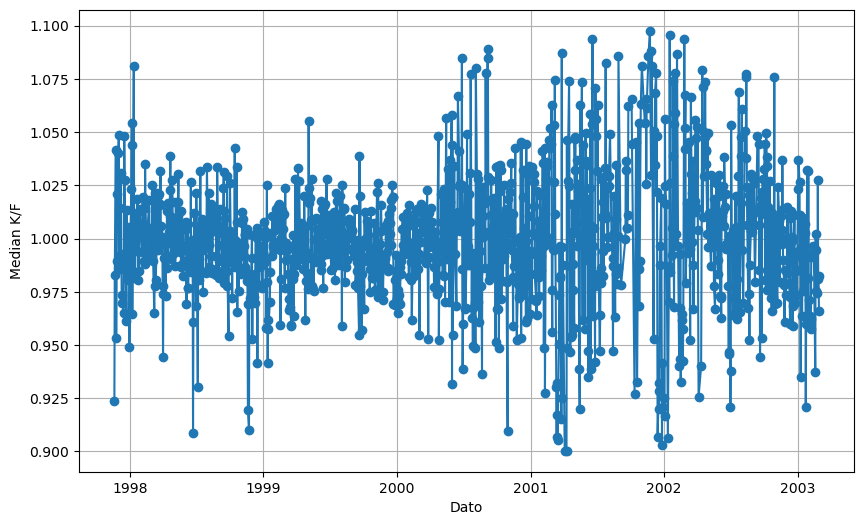

In [223]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_near_atm_ratio(df, ticker, tolerance=0.05):
    """
    Plots median(K/F) over tid for near-ATM optioner for en given ticker.
    tolerance angiver, hvor stor forskellen mellem K og F må være ift. F.
    """
    # Filtrér for den ønskede ticker
    df_ticker = df[df['ticker'] == ticker].copy()

    # Sørg for at data er sorteret efter dato
    df_ticker.sort_values('date', inplace=True)
    
    # Opret en kolonne for den relative forskel mellem K og F
    df_ticker['rel_diff'] = np.abs(df_ticker['K'] - df_ticker['F']) / df_ticker['F']
    
    # Filtrér for near-ATM, f.eks. ±5% fra forwardprisen
    near_atm = df_ticker[df_ticker['rel_diff'] < tolerance]
    
    # Beregn medianen af (K/F) pr. dato
    ratio_by_date = near_atm.groupby('date').apply(
        lambda g: (g['K']/g['F']).median()
    )
    ratio_by_date = ratio_by_date.reset_index(name='median_K_over_F')

    # Plot
    plt.figure(figsize=(10,6))
    plt.plot(ratio_by_date['date'], ratio_by_date['median_K_over_F'], marker='o', linestyle='-')
    plt.xlabel('Dato')
    plt.ylabel('Median K/F')
    plt.grid(True)
    plt.show()

# Eksempel på kald:
# plot_near_atm_ratio(od_rel, ticker='IBM')
plot_near_atm_ratio(od_rdy, ticker='AMZN', tolerance=0.1)


In [145]:
od_rdy

,date,exdate,cp_flag,K,bid,ask,volume,IV_om,optionid,ticker,n_trading_day,days,spread,mid,F,r,IV,low,high
40,1996-01-04,1996-01-20,P,75.0,0.1875,0.2500,422,0.468090,10324542,IBM,0,16,0.0625,0.21875,87.093136,0.057209,0.468090,True,False
42,1996-01-04,1996-01-20,C,100.0,0.1250,0.1875,1639,0.397731,10664612,IBM,0,16,0.0625,0.15625,87.093136,0.057209,0.397731,True,False
46,1996-01-04,1996-01-20,C,95.0,0.5000,0.5625,2979,0.386784,11038147,IBM,0,16,0.0625,0.53125,87.093136,0.057209,0.386784,True,False
47,1996-01-04,1996-01-20,P,70.0,0.0625,0.1250,845,0.544232,11096807,IBM,0,16,0.0625,0.09375,87.093136,0.057209,0.544232,True,False
48,1996-01-04,1996-01-20,P,85.0,1.7500,1.8125,3079,0.375169,11219995,IBM,0,16,0.0625,1.78125,87.093136,0.057209,0.375169,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482303,2003-02-28,2003-04-19,C,900.0,10.3000,10.5000,1349,0.248600,21355906,SPX,1800,50,0.2000,10.40000,840.707839,0.013356,0.248600,False,True
2482313,2003-02-28,2003-04-19,P,625.0,0.9500,1.1500,514,0.414053,21367471,SPX,1800,50,0.2000,1.05000,840.707839,0.013356,0.414053,False,True
2482314,2003-02-28,2003-04-19,P,650.0,1.6000,1.8000,48,0.399029,21370267,SPX,1800,50,0.2000,1.70000,840.707839,0.013356,0.399029,False,True
2482315,2003-02-28,2003-04-19,P,675.0,2.6000,2.8000,14,0.384198,21376488,SPX,1800,50,0.2000,2.70000,840.707839,0.013356,0.384198,False,True


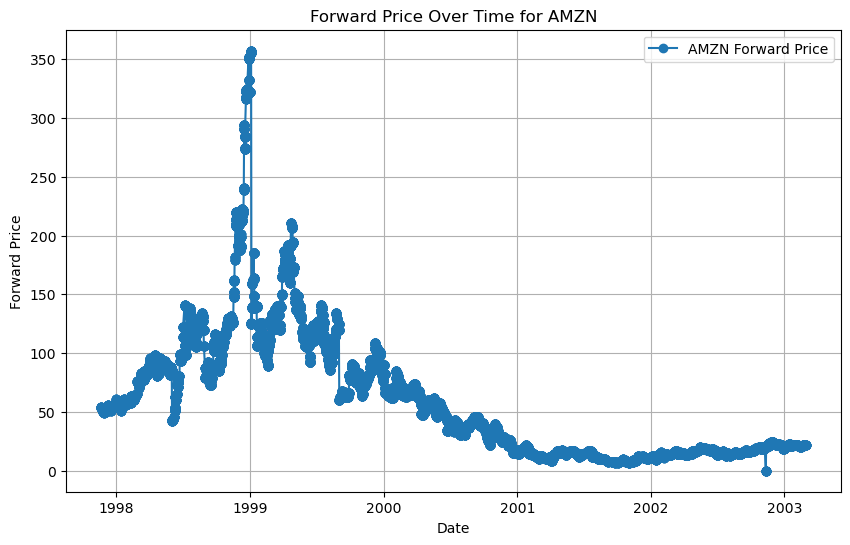

In [144]:
plot_forward_price(od_rdy, "AMZN", "F")

In [123]:
dftester[dftester['ticker']=="AMZN"]['forwardprice'].min()

1.9e-05

In [44]:
table_lib.CarrWu2009_table_1(summary_dly_df, print_latex = False)


,ticker,Starting_date,Ending_date,N,NK
2,SPX,04-Jan-1996,31-Aug-2023,6963,76.693236
1,NDX,04-Jan-1996,31-Aug-2023,6963,80.635143
0,AMZN,20-Nov-1997,31-Aug-2023,6375,60.517412


In [45]:
table_lib.CarrWu2009_table_2(summary_dly_df, print_latex = False)


,ticker,Mean_RV,Std_RV,Auto_RV,Skew_RV,Kurt_RV,Mean_SW,Std_SW,Auto_SW,Skew_SW,Kurt_SW
2,SPX,3.745898,7.064072,0.993832,7.033051,60.806095,4.794741,5.733705,0.901079,6.136161,65.662464
1,NDX,7.894568,11.597893,0.992016,3.853166,19.085864,8.904947,9.385680,0.937442,2.452786,8.212681
0,AMZN,30.922056,44.036055,0.986173,2.665012,8.056365,33.664722,43.691088,0.989264,2.833986,9.973088


In [46]:
table_lib.CarrWu2009_table_3(summary_dly_df, print_latex = False)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,ticker,Mean_diff,Std_diff,Auto_diff,Skew_diff,Kurt_diff,t_diff,Mean_ln,Std_ln,Auto_ln,Skew_ln,Kurt_ln,t_ln
2,SPX,-1.048843,5.541417,0.889734,5.598142,72.260600,-4.108811,-0.467040,0.679535,0.814110,1.037905,3.340643,NaN
1,NDX,-1.010379,7.513410,0.887284,3.626680,30.742708,-2.917165,-0.325992,0.597582,0.831968,0.880321,3.948787,NaN
0,AMZN,-3.175015,27.234746,0.932657,0.439062,12.018375,-2.571520,-0.276189,0.618645,0.919544,0.290088,1.068170,NaN


In [47]:
importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)

<module 'table_lib' from 'D:\\Professionelt\\Code\\volpy\\table_lib.py'>

In [48]:
table_lib.CarrWu2009_table_3_choose_stat(summary_dly_df, print_latex = False, stat = "RV_0_30-SW_0_30")

,ticker,Mean,Std,Auto,Skew,Kurt,t
2,SPX,-1.048843,5.541417,0.889734,5.598142,72.260600,-4.108811
1,NDX,-1.010379,7.513410,0.887284,3.626680,30.742708,-2.917165
0,AMZN,-3.175015,27.234746,0.932657,0.439062,12.018375,-2.571520


In [50]:
table_lib.CarrWu2009_table_3_choose_stat(summary_dly_df, print_latex = False, stat = "SW_day")

,ticker,Mean,Std,Auto,Skew,Kurt,t
2,SPX,-0.155531,2.410573,-0.161398,-1.141670,219.867800,-8.813081
1,NDX,-0.287148,3.011325,-0.171549,1.196371,148.757976,-11.416976
0,AMZN,-1.110014,6.381915,0.003373,-1.755007,76.659158,-9.724523


In [4]:
# # Load i2s1 full
# date_str = "2025-03_15_14-10"
# summary_dly_df = pd.read_csv(f"data/summary_dly_df {date_str}.csv")
# od_rdy = pd.read_csv(f"data/od_rdy {date_str}.csv")

In [5]:
def one_ticker(summary_dly_df, ticker = "SPX"):
    df_ticker = summary_dly_df[summary_dly_df["ticker"] == ticker].reset_index(drop = True)
    df_ticker = df_ticker[df_ticker["SW_day_return"].isna() == False]
    return df_ticker

In [6]:
df = one_ticker(summary_dly_df, "SPX")

In [7]:
max(np.maximum(df["SW_sell"], 0.001))

1.173559018807811

In [8]:
min(np.maximum(df["SW_sell"], 0.001) / np.maximum(df["SW_buy"], 0.001) - 1)

-0.9615923636030196

In [16]:
np.cumprod(2 - np.maximum(df["SW_sell"], 0.001) / np.maximum(df["SW_buy"], 0.001))

1        1.086992e+00
2        1.184104e+00
3        5.494757e-01
4        5.735089e-01
5        7.100811e-01
            ...      
6958     6.303410e-99
6959     7.004216e-99
6960     6.039512e-99
6961     1.003207e-98
6962   -3.645868e-100
Length: 6962, dtype: float64

In [45]:
summary_dly_df["ticker"].unique()

array(['NDX', 'SPX', 'AMZN'], dtype=object)

In [66]:
df = one_ticker(summary_dly_df, "NDX")

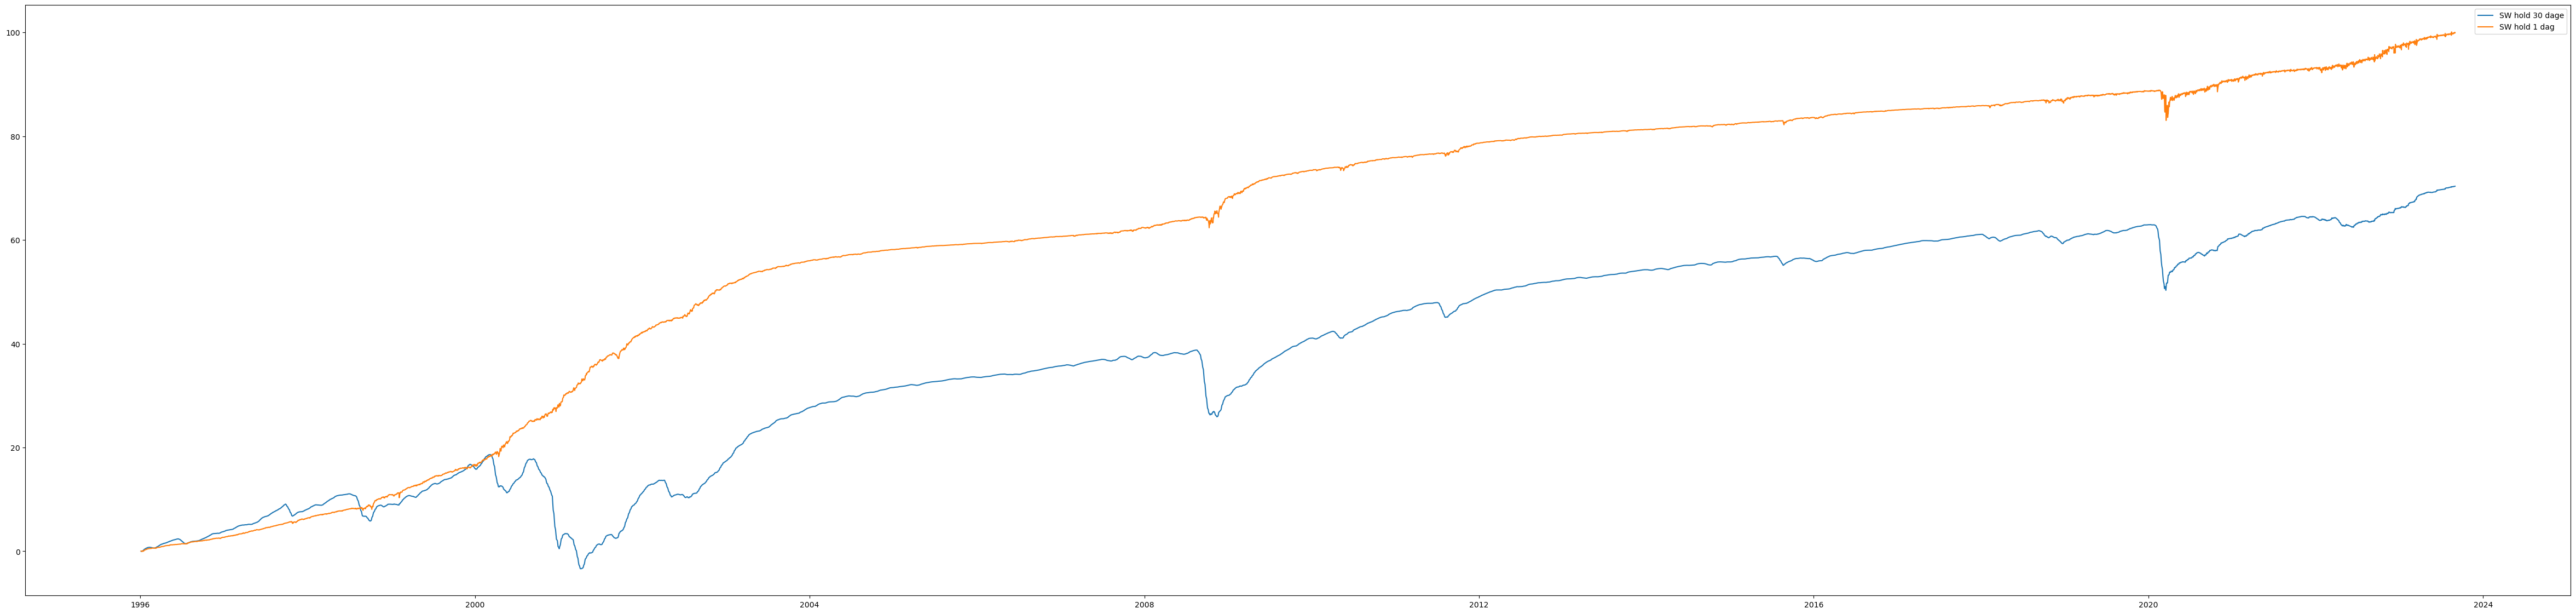

In [67]:
plt.figure(figsize=(60, 14))
plt.plot( df["date"] , np.cumsum((df["SW_0_30"] - df["RV"] )) , label = "SW hold 30 dage")
plt.plot( df["date"] , -5*np.cumsum(df["SW_day"]), label = "SW hold 1 dag")
plt.legend()
plt.show()

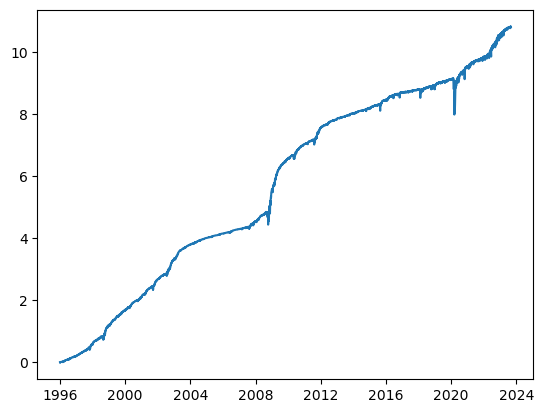

In [21]:
plt.plot( df["date"] , np.cumsum(-df["SW_day"]))
plt.show()

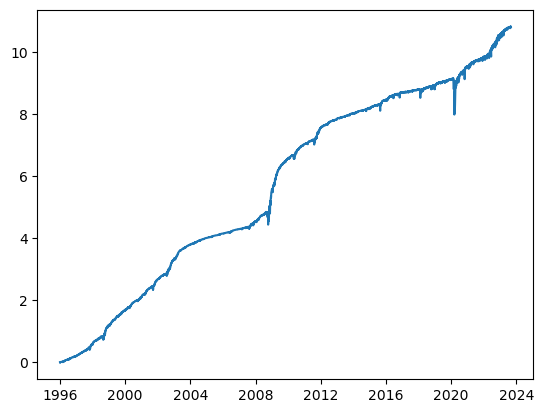

In [18]:
plt.plot( df["date"] , -np.cumsum(df["SW_day"]))
plt.show()

In [ ]:
plt.plot( df["date"] , df["SW_day"])
plt.show()

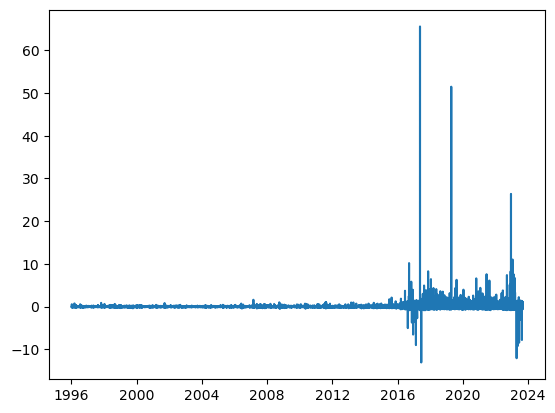

In [20]:
plt.plot( df["date"] , df["SW_day_return"])
plt.show()

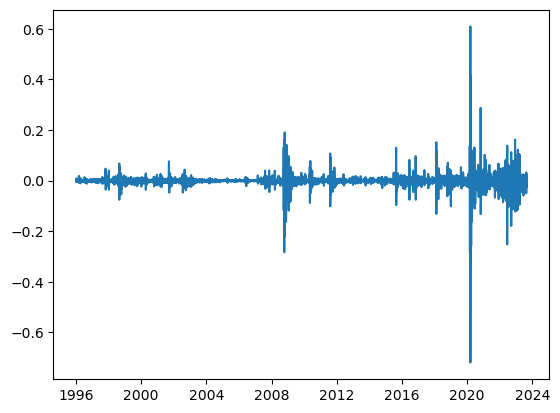

In [19]:
plt.plot( df["date"] , df["SW_day"])
plt.show()

In [37]:
SPX

,ticker,date,#days,low days,high days,low #K,high #K,#K,low SW,high SW,...,RV,open,squared_return,SW_0_30,SW_m1_29,SW_0_29,SW_day,SW_day_return,SW_sell,SW_buy
1,SPX,1996-01-05,6.0,15.0,43.0,26.0,24.0,25.0,0.017910,0.016568,...,0.015841,617.70,0.000003,0.016880,0.017860,0.016869,-0.001554,-0.086992,0.016307,0.017860
2,SPX,1996-01-08,6.0,12.0,40.0,20.0,24.0,22.0,0.016703,0.015776,...,0.016645,616.71,0.000008,0.015908,0.016880,0.015901,-0.001508,-0.089340,0.015372,0.016880
3,SPX,1996-01-09,6.0,11.0,39.0,23.0,24.0,23.5,0.039962,0.023438,...,0.016908,618.46,0.000212,0.025385,0.015908,0.025269,0.008526,0.535957,0.024434,0.015908
4,SPX,1996-01-10,6.0,10.0,38.0,21.0,25.0,23.0,0.033677,0.024267,...,0.015500,609.45,0.000324,0.025163,0.025385,0.025101,-0.001110,-0.043738,0.024275,0.025385
5,SPX,1996-01-11,6.0,9.0,37.0,17.0,24.0,20.5,0.019887,0.019826,...,0.011791,598.48,0.000049,0.019830,0.025163,0.019830,-0.005992,-0.238134,0.019171,0.025163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,SPX,2023-08-25,42.0,4.0,5.0,119.0,126.0,122.5,0.013806,0.015857,...,0.015730,4389.38,0.000045,0.022693,0.024453,0.021161,-0.003996,-0.163412,0.020457,0.024453
6959,SPX,2023-08-28,42.0,2.0,3.0,112.0,182.0,147.0,0.019612,0.020260,...,0.016819,4426.03,0.000039,0.021428,0.022693,0.020864,-0.002523,-0.111179,0.020170,0.022693
6960,SPX,2023-08-29,42.0,2.0,3.0,189.0,175.0,182.0,0.022140,0.023731,...,0.019129,4432.75,0.000210,0.026595,0.021428,0.025213,0.002951,0.137732,0.024379,0.021428
6961,SPX,2023-08-30,42.0,2.0,6.0,160.0,136.0,148.0,0.022032,0.011503,...,0.002173,4500.34,0.000015,0.007291,0.026595,0.009324,-0.017581,-0.661073,0.009014,0.026595


In [158]:
SPX["SW_buy"]

1       0.017484
2       0.016494
3       0.015528
4       0.025016
5       0.024791
          ...   
6958    0.024387
6959    0.022696
6960    0.021470
6961    0.026605
6962    0.007231
Name: SW_buy, Length: 6962, dtype: float64

In [38]:
SPX["SW_sell"].min()

-0.00028882011915477905

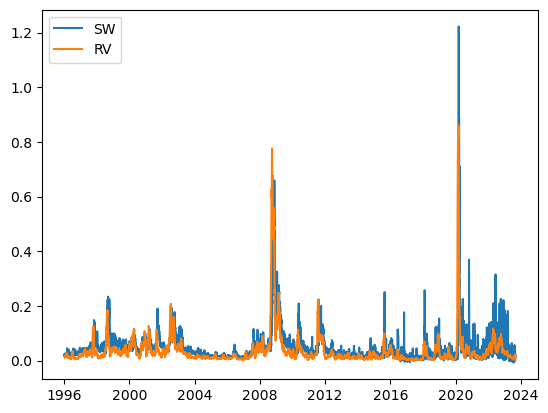

In [39]:
plt.plot(SPX["date"], SPX["SW_0_30"], label = "SW")
plt.plot(SPX["date"], SPX["RV"], label = "RV")
plt.legend()
plt.show()

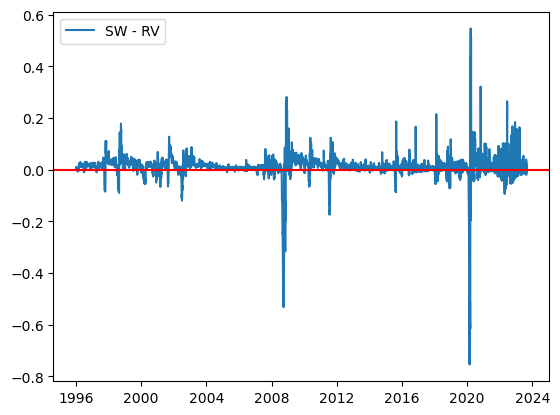

In [40]:
plt.plot(SPX["date"], SPX["SW_0_30"] - SPX["RV"], label = "SW - RV")
plt.legend()
plt.axhline(y=0, color = "red")
plt.show()

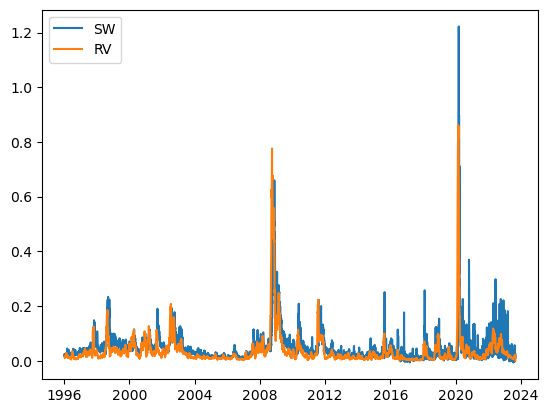

In [165]:
plt.plot(SPX["date"], SPX["SW_0_30"], label = "SW")
plt.plot(SPX["date"], SPX["RV"], label = "RV")
plt.legend()
plt.show()

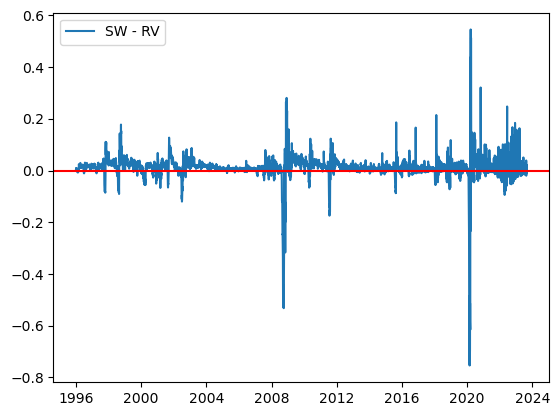

In [171]:
plt.plot(SPX["date"], SPX["SW_0_30"] - SPX["RV"], label = "SW - RV")
plt.legend()
plt.axhline(y=0, color = "red")
plt.show()

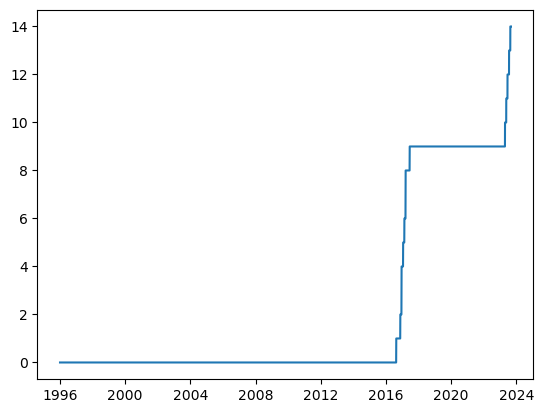

In [41]:
plt.plot(SPX["date"], np.cumsum(SPX["SW_buy"]<0))

In [43]:
min(SPX["SW_sell"]/SPX["SW_buy"]-1)

-13.100232650793211

In [44]:
max(SPX["SW_sell"]/SPX["SW_buy"]-1)

65.5856150940696

In [45]:
np.mean(SPX["SW_sell"]/SPX["SW_buy"]-1)

0.049239789338758916